In [1]:
import pandas as pd
import numpy as np
import plotly
import importlib
import asana
import wartsila_asana_utils as wa
import wartsila_resource_analysis_utils as warsut

import prototype_wa_utilities as pwut

import plotly.express as px

In [72]:
importlib.reload(wa)
importlib.reload(pwut)
importlib.reload(warsut)

<module 'wartsila_resource_analysis_utils' from 'C:\\Users\\dha042\\Documents\\W_Development\\Resource_Planning\\wartsila_resource_analysis_utils.py'>

# 1 - Getting all the Data

In [3]:
df_global = wa.get_global_portfolio_data()

In [4]:
df_rstasks = wa.get_resource_project_data()

In [5]:
df_personnel = wa.get_delivery_personnel_data()

## 1.1 - Merging Portfolio Data with Resource Task Data

In [6]:
# implementation
df_rglobal = df_rstasks.merge(df_global, left_on='eso_project_name', right_on='name').drop(columns=['name'])

# 2 - Data Engineering

In [48]:
# implementation
def add_engineered_columns(df):
    df = pwut.make_num_projects_column(df)
    df = pwut.make_workload_units(df)
    df = pwut.make_project_type_workload_columns(df)
    df = pwut.make_assigned_status_column(df)
    #df = add_role_group_column(df)
    return df

In [49]:
# implementation
df = add_engineered_columns(df_rglobal)

In [50]:
# verification
df.columns

Index(['assignee_name', 'role', 'region', 'eso_project_name', 'start_date',
       'due_date', 'project_type', 'gid', 'resource_type', '[ESO] Stage',
       'Contract COD [ESO]', 'City/State/Country [ESO]', 'Priority',
       'Project Type [ESO]', 'Region [ESO]', 'Power (MW) [ESO]',
       'Capacity (MWh) [ESO]', 'Batt Enclosure (qty)', 'Inverter Qty [ESO]',
       'ACC/DCC Qty', 'Product', 'Role [ESO]', 'Delivery Roles [ESO]',
       'Status (Design)', 'Effort level?', 'num_projects', 'workload_units',
       'num_eeq_projects', 'num_epc_projects', 'num_no_type_projects',
       'eeq_workload', 'epc_workload', 'assigned_status'],
      dtype='object')

In [65]:
# Verification
df#.loc[df['assigned_status']!='unassigned']

,assignee_name,role,region,eso_project_name,start_date,due_date,project_type,gid,resource_type,[ESO] Stage,...,Status (Design),Effort level?,num_projects,workload_units,num_eeq_projects,num_epc_projects,num_no_type_projects,eeq_workload,epc_workload,assigned_status
0,Brian Pizzi,Solution Engineer,no_region,P/22454 Clearway Rosamond,2023-06-05,2023-12-01,no_type,1202901532753744,project,G2 - Delivery,...,NaN,NaN,1,1,0,0,1,0.0,0.0,assigned
1,unassigned,no_role,no_region,P/22454 Clearway Rosamond,2022-12-01,2022-12-02,no_type,1202901532753744,project,G2 - Delivery,...,NaN,NaN,1,1,0,0,1,0.0,0.0,unassigned
2,unassigned,no_role,no_region,P/22454 Clearway Rosamond,2022-12-29,2023-02-02,no_type,1202901532753744,project,G2 - Delivery,...,NaN,NaN,1,1,0,0,1,0.0,0.0,unassigned
3,unassigned,no_role,no_region,P/22454 Clearway Rosamond,2022-12-29,2023-02-02,no_type,1202901532753744,project,G2 - Delivery,...,NaN,NaN,1,1,0,0,1,0.0,0.0,unassigned
4,unassigned,no_role,no_region,P/22454 Clearway Rosamond,NaT,2022-12-01,no_type,1202901532753744,project,G2 - Delivery,...,NaN,NaN,1,1,0,0,1,0.0,0.0,unassigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Nabeel Yaseen,Solution Engineer,EUAF,P/22201 SSE Salisbury 49.5MW,2022-04-01,2023-09-22,EPC,1202021927476446,project,G2 - Delivery,...,none,none,1,1,0,1,0,0.0,0.3,assigned
462,alec.stablow@wartsila.com,SW Engineer,EUAF,P/22201 SSE Salisbury 49.5MW,2022-04-01,2023-09-22,EPC,1202021927476446,project,G2 - Delivery,...,none,none,1,1,0,1,0,0.0,0.3,assigned
463,Daniel Hockborn,Commissioning Manager,EUAF,P/22201 SSE Salisbury 49.5MW,NaT,2022-08-31,EPC,1202021927476446,project,G2 - Delivery,...,none,none,1,1,0,1,0,0.0,0.3,assigned
464,Daniel Hockborn,Commissioning Manager,EUAF,P/22201 SSE Salisbury 49.5MW,NaT,2022-08-31,EPC,1202021927476446,project,G2 - Delivery,...,none,none,1,1,0,1,0,0.0,0.3,assigned


# 3 - Preparing for Pipeline Analysis

## 3.1 Development Breadcrumbs

In [10]:
# verifying length of auto-generated filter list
# combinations = len(pipeline_options) * len(region_options) * len(role_options)
# print(combinations)
# print('-'*5)
# len(filters_list_for_analysis)

In [11]:
# filter_dict = {'region': 'AMER', 'role': 'System Engineer', '[ESO] Stage': 'G2 - Delivery'}

In [12]:
# def make_list_of_all_filters(df):
#     role_options = df['role'].unique().tolist()
#     region_options = df['region'].unique().tolist()
#     pipeline_options = df['[ESO] Stage'].unique().tolist()
    
#     # make all filters
#     filters_list_for_analysis = list()
#     for region in region_options: 
#         for role in role_options:
#             for stage in pipeline_options:
#                 filters_list_for_analysis.append({'region': region, 'role': role, '[ESO] Stage': stage})
    
#     return filters_list_for_analysis

In [13]:
# make_list_of_all_filters(df)

In [14]:
# df1 = pwut.apply_filter_from_dict(df, filters_list_for_analysis[99])
# df1

In [15]:
# verify all filters being applied
# for fil_d in filters_list_for_analysis:
#     print(fil_d)
#     df1 = pwut.apply_filter_from_dict(df, fil_d)
#     print(df1['role'].unique())
#     print(df1['region'].unique())
#     print(df1['[ESO] Stage'].unique())
#     print('-'*5)  

## 3.2 Final Function

In [51]:
# implementation
filters_list = pwut.make_list_of_workload_pre_analysis_filters(df)

# discussion
# apply the analysis function to each dict in the above list
# example of how each dict in the list is meant to be used
#df1 = pwut.apply_filter_from_dict(df, filters_list_for_analysis[99])

# Interlude - What the fuck is going on

In [ ]:
# fuck the filter list for now

In [78]:
# implementation - in development
df_unas_out = df[df['assigned_status']=='unassigned']
df_assn_out = df[df['assigned_status']=='assigned']

df_person_days = make_personnel_analysis_by_date(df_assn_out)
df_unas_days = make_unassigned_summary_by_date(df_unas_out)

df_expand = df_person_days.merge(df_unas_days, left_on='date', right_on='date', 
                              suffixes=('_assigned', '_unassigned'))

df_expand['workload_diff'] = df_expand['available_workload_assigned'] - df_expand['total_workload_unassigned'] 
df_expand 

KeyError: 'date'

# 4 Outline for Final Steps

1. create collecting list for the dfs returned by analysis function
2. apply analysis function for filtered df for each filter in 'filters_list'
3. append returned df to collector from step 1
4. generate final dataframe with all analysis results

## 4.1 Prototyping

In [28]:
filters_list = pwut.make_list_of_workload_pre_analysis_filters(df)

for f in filters_list: 
    if f == {'region': 'AMER', 'role': 'System Engineer', '[ESO] Stage': 'G2 - Delivery', 'assigned_status': 'unassigned'}:
        print(f)

{'region': 'AMER', 'role': 'System Engineer', '[ESO] Stage': 'G2 - Delivery', 'assigned_status': 'unassigned'}


In [114]:
# verification
filters_list = pwut.make_list_of_workload_pre_analysis_filters(df)
# apply the analysis function to each dict in the above list
# example of how each dict in the list is meant to be used
df1 = pwut.apply_filter_from_dict(df, {'region': 'MEA', 'role': 'System Engineer', '[ESO] Stage': 'G2 - Delivery'})

In [18]:
# verification
df1['workload_units'].sum(axis=0)
print(len(df1.index))

12


In [29]:
df1 = pwut.apply_filter_from_dict(df,{'region': 'AMER', 'role': 'System Engineer', '[ESO] Stage': 'G2 - Delivery', 'assigned_status': 'unassigned'})
df1

,assignee_name,role,region,eso_project_name,start_date,due_date,project_type,gid,resource_type,[ESO] Stage,...,Status (Design),Effort level?,num_projects,workload_units,num_eeq_projects,num_epc_projects,num_no_type_projects,eeq_workload,epc_workload,assigned_status
120,unassigned,System Engineer,AMER,OP/726086 - LSSS - Torrens Island,2022-08-15,2023-08-15,no_type,1202710454262616,project,G2 - Delivery,...,NaN,NaN,1,1,0,0,1,0.0,0.0,unassigned


## 4.2 Implementation

In [70]:
fil_dict = {'region': 'AMER', 'role': 'System Engineer', '[ESO] Stage': 'G2 - Delivery'}
temp_df = df.copy()

temp_una_df = temp_df[temp_df['assigned_status'] == 'unassigned']
temp_assn_df = temp_df[temp_df['assigned_status'] == 'assigned']

df_analysis_assn = temp_assn_df.groupby('date').sum().reset_index() 
df_analysis_una = temp_una_df.groupby('date').sum().reset_index()

display(df_analysis_una)

KeyError: 'assigned_status'

In [68]:
temp_df

,date,num_projects,workload_units,num_eeq_projects,num_epc_projects,num_no_type_projects,eeq_workload,epc_workload,total_workload,available_workload
0,2022-01-01,14,14,0,0,14,0.0,0.0,0.0,14.0
1,2022-01-02,14,14,0,0,14,0.0,0.0,0.0,14.0
2,2022-01-03,14,14,0,0,14,0.0,0.0,0.0,14.0
3,2022-01-04,15,15,0,0,15,0.0,0.0,0.0,15.0
4,2022-01-05,15,15,0,0,15,0.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...
643,2023-10-06,1,1,0,0,1,0.0,0.0,0.0,1.0
644,2023-10-07,1,1,0,0,1,0.0,0.0,0.0,1.0
645,2023-10-08,1,1,0,0,1,0.0,0.0,0.0,1.0
646,2023-10-09,1,1,0,0,1,0.0,0.0,0.0,1.0


In [66]:
# every filter for everything

filters_list = pwut.make_list_of_workload_pre_analysis_filters(df)
# 1. create collecting list for dfs returned by analysis function 
collected_dfs_list = list()
#2. apply analysis function to the df resulting from applying each filter in filter list
for fil_dict in filters_list: 
    temp_df = make_personnel_analysis_by_date(pwut.apply_filter_from_dict(df, fil_dict))
    temp_df = temp_df.groupby('date').sum().reset_index() # this could be left out if wanted powebi to do it live
    temp_df['region'] = fil_dict['region']
    temp_df['role'] = fil_dict['role']
    temp_df['[ESO] Stage'] = fil_dict['[ESO] Stage']
    temp_df['assigned_status'] = fil_dict['assigned_status']
#3. append returned df to collector from step 1
    collected_dfs_list.append(temp_df)
#4. make dataframe from list of dfs
df_analysis = pd.concat(collected_dfs_list)

KeyboardInterrupt: 

In [53]:
df_analysis

,date,num_projects,workload_units,num_eeq_projects,num_epc_projects,num_no_type_projects,eeq_workload,epc_workload,total_workload,available_workload,region,role,[ESO] Stage,assigned_status
0,2023-03-02,1,1,0,0,1,0.0,0.0,0.0,1.0,no_region,Solution Engineer,G2 - Delivery,assigned
1,2023-03-03,1,1,0,0,1,0.0,0.0,0.0,1.0,no_region,Solution Engineer,G2 - Delivery,assigned
2,2023-03-04,1,1,0,0,1,0.0,0.0,0.0,1.0,no_region,Solution Engineer,G2 - Delivery,assigned
3,2023-03-05,1,1,0,0,1,0.0,0.0,0.0,1.0,no_region,Solution Engineer,G2 - Delivery,assigned
4,2023-03-06,1,1,0,0,1,0.0,0.0,0.0,1.0,no_region,Solution Engineer,G2 - Delivery,assigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,2023-06-02,1,1,1,0,0,0.2,0.0,0.2,0.8,EUAF,Electrical Engineer - Delivery,G2 - Delivery,unassigned
405,2023-06-03,1,1,1,0,0,0.2,0.0,0.2,0.8,EUAF,Electrical Engineer - Delivery,G2 - Delivery,unassigned
406,2023-06-04,1,1,1,0,0,0.2,0.0,0.2,0.8,EUAF,Electrical Engineer - Delivery,G2 - Delivery,unassigned
407,2023-06-05,1,1,1,0,0,0.2,0.0,0.2,0.8,EUAF,Electrical Engineer - Delivery,G2 - Delivery,unassigned


In [57]:
df_analysis.to_csv('resource_table_by_date.csv', index=False)

In [64]:
pivot_values = ['num_eeq_projects', 'num_epc_projects', 'num_no_type_projects', 'eeq_workload', 'epc_workload']
df_pivot = df_analysis.pivot(index='date', columns='assigned_status', values=pivot_values)
df_pivot

ValueError: Index contains duplicate entries, cannot reshape

In [58]:
df_unas_out = df_analysis[df_analysis['assigned_status']=='unassigned']
df_assn_out = df_analysis[df_analysis['assigned_status']=='assigned']


In [61]:
df_expand = df_assn_out.merge(df_unas_out, left_on='date', right_on='date', 
                              suffixes=('_assigned', '_unassigned'))

df_expand['workload_diff'] = df_expand['available_workload_assigned'] - df_expand['total_workload_unassigned'] 
df_expand 

In [41]:
df_unas_out.to_csv('unassigned_resource_table_by_date.csv', index=False)
df_assn_out.to_csv('assigned_resource_table_by_date.csv', index=False)

['System Engineer']
['AMER']
['G2 - Delivery']


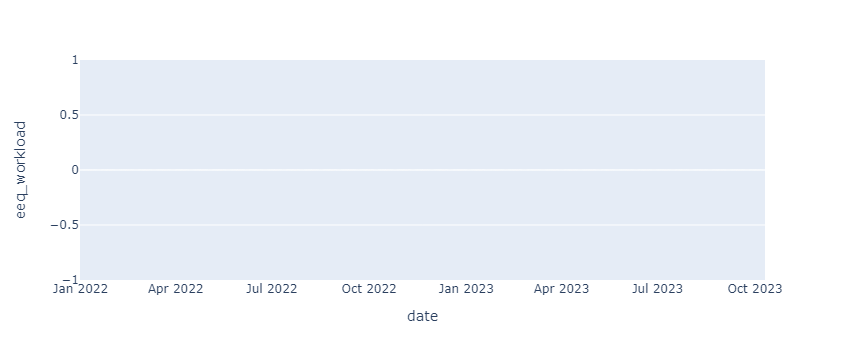

In [142]:
# plotting Person 
# plot for verification
df_af = df_analysis.reset_index()
df_af = df_af[df_af['region'] == 'AMER']
df_af = df_af[df_af['role'] == 'System Engineer']
df_af = df_af[df_af['[ESO] Stage'] == 'G2 - Delivery']
#df_af = df_af[df_af['assignee_name'] == 'Derek Chung']


print(df_af['role'].unique())
print(df_af['region'].unique())
print(df_af['[ESO] Stage'].unique())

px.bar(df_af, x='date', y='eeq_workload')

# 5  personnel analysis

In [19]:
df_personnel = wa.get_personnel_project_data()

In [21]:
pwut.make_single_person_summary(df)

,assignee_name,role,region,eso_project_name,start_date,due_date,project_type,gid,resource_type,[ESO] Stage,...,ACC/DCC Qty,Product,Role [ESO],Delivery Roles [ESO],Status (Design),Effort level?,workload_units,eeq_workload,epc_workload,total_workload
0,Brian Pizzi,Solution Engineer,no_region,P/22454 Clearway Rosamond,2023-06-05,2023-12-01,no_type,1202901532753744,project,G2 - Delivery,...,none,none,none,NaN,NaN,NaN,1,0.0,0.0,0.0
1,unassigned,no_role,no_region,P/22454 Clearway Rosamond,2022-12-01,2022-12-02,no_type,1202901532753744,project,G2 - Delivery,...,none,none,none,NaN,NaN,NaN,1,0.0,0.0,0.0
2,unassigned,no_role,no_region,P/22454 Clearway Rosamond,2022-12-29,2023-02-02,no_type,1202901532753744,project,G2 - Delivery,...,none,none,none,NaN,NaN,NaN,1,0.0,0.0,0.0
3,unassigned,no_role,no_region,P/22454 Clearway Rosamond,2022-12-29,2023-02-02,no_type,1202901532753744,project,G2 - Delivery,...,none,none,none,NaN,NaN,NaN,1,0.0,0.0,0.0
4,unassigned,no_role,no_region,P/22454 Clearway Rosamond,NaT,2022-12-01,no_type,1202901532753744,project,G2 - Delivery,...,none,none,none,NaN,NaN,NaN,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Nabeel Yaseen,Solution Engineer,EUAF,P/22201 SSE Salisbury 49.5MW,2022-04-01,2023-09-22,EPC,1202021927476446,project,G2 - Delivery,...,26,Quantum,CPE Civil,Systems Engineer,none,none,1,0.0,0.3,0.3
462,alec.stablow@wartsila.com,SW Engineer,EUAF,P/22201 SSE Salisbury 49.5MW,2022-04-01,2023-09-22,EPC,1202021927476446,project,G2 - Delivery,...,26,Quantum,CPE Civil,Systems Engineer,none,none,1,0.0,0.3,0.3
463,Daniel Hockborn,Commissioning Manager,EUAF,P/22201 SSE Salisbury 49.5MW,NaT,2022-08-31,EPC,1202021927476446,project,G2 - Delivery,...,26,Quantum,CPE Civil,Systems Engineer,none,none,1,0.0,0.3,0.3
464,Daniel Hockborn,Commissioning Manager,EUAF,P/22201 SSE Salisbury 49.5MW,NaT,2022-08-31,EPC,1202021927476446,project,G2 - Delivery,...,26,Quantum,CPE Civil,Systems Engineer,none,none,1,0.0,0.3,0.3


# 5.1 getting data for every person for every day

## 5.X this might just end up being the main table for analysis then groupbys can generate the final data

In [102]:
# todo 
#--- columns
# name
# date
# region
# total_workload
# epc_workload
# eeq_workload



In [54]:
## Daily Time Reference 
def make_personnel_analysis_by_date(df, start_date='1/1/2022', end_date='1/1/2024'):
    """
    Returns
    --------
    pandas dataframe : total individual person workload by date 
    """
    
    start = pd.Timestamp(start_date)
    end = pd.Timestamp(end_date)
    tindex = pd.date_range(start, end)
    df_dater2 = pd.DataFrame(tindex, columns=['date'])

    dfs_day_sums = list()
    for _, r in df_dater2.iterrows():
        df_day = wa.filter_tasks_by_time_window(df, r['date'], r['date'])
        df_day_analysis = pwut.make_single_person_summary(df_day).reset_index()
        df_day_analysis['date'] = r['date']
        #display(df_day_analysis)
        
        dfs_day_sums.append(df_day_analysis)
        
    return pd.concat(dfs_day_sums)
    
    

In [85]:
def make_unassigned_summary_by_date(df, start_date='1/1/2022', end_date='1/1/2024'):
    """
    Returns
    --------
    pandas dataframe : total unassigned workload by date 
    """
    
    start = pd.Timestamp(start_date)
    end = pd.Timestamp(end_date)
    tindex = pd.date_range(start, end)
    df_dater2 = pd.DataFrame(tindex, columns=['date'])

    dfs_day_sums = list()
    for _, r in df_dater2.iterrows():
        df_day = wa.filter_tasks_by_time_window(df, r['date'], r['date'])
        #df_day_analysis = pwut.make_unassigned_day_summary(df_day).reset_index()
        df_day_analysis = df_day.sum()
        df_day_analysis['date'] = r['date']
        #display(df_day_analysis)
        
        dfs_day_sums.append(df_day_analysis)
        
    return pd.concat(dfs_day_sums)


In [87]:
def make_workload_summary_by_date(df, start_date='1/1/2022', end_date='1/1/2024'):
    """
    Returns
    --------
    pandas dataframe : total unassigned workload by date 
    """
    
    start = pd.Timestamp(start_date)
    end = pd.Timestamp(end_date)
    tindex = pd.date_range(start, end)
    df_dater2 = pd.DataFrame(tindex, columns=['date'])

    dfs_day_sums = list()
    for _, r in df_dater2.iterrows():
        df_day = wa.filter_tasks_by_time_window(df, r['date'], r['date'])
        #df_day_analysis = pwut.make_unassigned_day_summary(df_day).reset_index()
        df_day_analysis = df_day.groupby('assigned_status').sum()
        df_day_analysis['date'] = r['date']
        #display(df_day_analysis)
        
        dfs_day_sums.append(df_day_analysis)
        
    return pd.concat(dfs_day_sums)

In [100]:
df_selected = df.copy()

df_work = make_workload_summary_by_date(df_selected).reset_index()
df_work['total_workload'] = df_work['eeq_workload'] + df_work['epc_workload']
df_unas_final = df_work[df_work['assigned_status']=='unassigned']
df_unas_final


,assigned_status,num_projects,workload_units,num_eeq_projects,num_epc_projects,num_no_type_projects,eeq_workload,epc_workload,date,total_workload
1,unassigned,15,15,0,0,14,0.0,0.0,2022-01-01,0.0
3,unassigned,15,15,0,0,14,0.0,0.0,2022-01-02,0.0
5,unassigned,17,17,0,0,16,0.0,0.0,2022-01-03,0.0
7,unassigned,17,17,0,0,16,0.0,0.0,2022-01-04,0.0
9,unassigned,17,17,0,0,16,0.0,0.0,2022-01-05,0.0
...,...,...,...,...,...,...,...,...,...,...
1426,unassigned,11,11,0,0,11,0.0,0.0,2023-12-28,0.0
1427,unassigned,11,11,0,0,11,0.0,0.0,2023-12-29,0.0
1428,unassigned,10,10,0,0,10,0.0,0.0,2023-12-30,0.0
1429,unassigned,10,10,0,0,10,0.0,0.0,2023-12-31,0.0


In [96]:
#need to do the following for each date
df_available_final = make_personnel_analysis_by_date(df_selected).groupby('date').sum().reset_index()

#### !!!!!
# no_type_proects still a problem
# pipeline shit is still fucked - pivot table
# merge df_available_final with df_unas_final

,date,num_projects,workload_units,num_eeq_projects,num_epc_projects,num_no_type_projects,eeq_workload,epc_workload,total_workload,available_workload
0,2022-01-01,141,141,0,0,134,0.0,0.0,0.0,141.0
1,2022-01-02,142,142,0,0,135,0.0,0.0,0.0,142.0
2,2022-01-03,144,144,0,0,137,0.0,0.0,0.0,144.0
3,2022-01-04,149,149,0,0,142,0.0,0.0,0.0,149.0
4,2022-01-05,149,149,0,0,142,0.0,0.0,0.0,149.0
...,...,...,...,...,...,...,...,...,...,...
726,2023-12-28,11,11,0,0,11,0.0,0.0,0.0,11.0
727,2023-12-29,11,11,0,0,11,0.0,0.0,0.0,11.0
728,2023-12-30,10,10,0,0,10,0.0,0.0,0.0,10.0
729,2023-12-31,10,10,0,0,10,0.0,0.0,0.0,10.0


In [86]:
make_unassigned_summary_by_date(df[df['assigned_status']=='unassigned'])

C:\Users\dha042\AppData\Local\Temp\ipykernel_8168\2751893890.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_day_analysis = df_day.sum()
C:\Users\dha042\AppData\Local\Temp\ipykernel_8168\2751893890.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_day_analysis = df_day.sum()
C:\Users\dha042\AppData\Local\Temp\ipykernel_8168\2751893890.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_day_analysis = df_day.sum()
C:\Users\dha042\AppData\Local\Temp\ipykernel_8168\27518

assignee_name           unassignedunassignedunassignedunassignedAntti ...
role                    Site Managerno_roleno_roleSW Engineerno_roleCP...
region                  AMERAMERAMERAMERMEAMEAMEAMEAMEAMEAMEAEUAFEUAFE...
eso_project_name        P/21463 LeConte Energy StorageP/17402 WAPA RHP...
project_type            no_typeno_typeno_typeno_typeno_typeno_typeno_t...
                                              ...                        
num_no_type_projects                                                   10
eeq_workload                                                          0.0
epc_workload                                                          0.0
assigned_status         unassignedunassignedunassignedunassignedunassi...
date                                                  2024-01-01 00:00:00
Length: 18644, dtype: object

In [55]:
df_person_day = make_personnel_analysis_by_date(df)

In [56]:
df_person_day

,assignee_name,num_projects,workload_units,num_eeq_projects,num_epc_projects,num_no_type_projects,eeq_workload,epc_workload,total_workload,available_workload,date
0,Adam Abdool,2,2,0,0,2,0.0,0.0,0.0,2.0,2022-01-01
1,Ahmed Darwish,2,2,0,0,1,0.0,0.0,0.0,2.0,2022-01-01
2,Alejandro Azocar,6,6,0,0,6,0.0,0.0,0.0,6.0,2022-01-01
3,Antti Pitkänen,1,1,0,0,1,0.0,0.0,0.0,1.0,2022-01-01
4,Asem Ahmed,2,2,0,0,2,0.0,0.0,0.0,2.0,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...
1,unassigned,7,7,0,0,7,0.0,0.0,0.0,7.0,2023-12-30
0,Antti Pitkänen,3,3,0,0,3,0.0,0.0,0.0,3.0,2023-12-31
1,unassigned,7,7,0,0,7,0.0,0.0,0.0,7.0,2023-12-31
0,Antti Pitkänen,3,3,0,0,3,0.0,0.0,0.0,3.0,2024-01-01


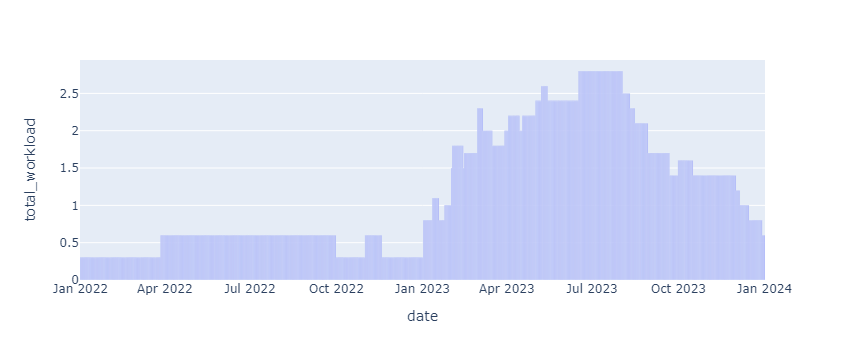

In [76]:
df_unassigned = df_person_day[df_person_day['assignee_name'] == 'Antti Pitkänen'].copy()
px.bar(df_unassigned, x='date', y='total_workload')

# 6 Refactoring old code

## Refactoring the resource Analysis

In [ ]:
### Initial Data PreProcessing 
def prepare_data_for_analysis(df_in, use_pj_groups=True)
    """
    Input
    -----
    df_in : dataframe - preformatted tasks from asan api
    use_pj_groups : apply groupings to colocated Wartsila Projects
    
    Returns
    -------
    
    
    """

    if use_pj_groups:
        df_tasks = make_project_groups(df_in.copy())
        print('using groups')
    else:
        df_tasks = df_in.copy()
   
    ## Unassigned - Cx
    # get all cx 'unassigned' tasks (denoted by 'Antti Pitkanen' as assignee)
    df_t = df_tasks
    df_t = df_t[df_t['assignee_name']=='Antti Pitkänen']

    ## Reference Cx Personnel
    pdb_list = wa.get_persondb_api_data()
    df_personnel_master = wa.make_persondb_df(pdb_list)
    df_p_all = df_personnel_master.copy()

    cx_all_persons = df_p_all[df_p_all['role'].isin(['Commissioning Manager', 'Commissioning Engineer'])].sort_values('region')
    cx_all_persons_count = cx_all_persons['person_name'].nunique()
    list_all_cx_persons = cx_all_persons['person_name'].tolist()

    ## Assigned - Cx
    # Get tasks assigned to Cx Managers or Cx Engineers
    roles_list = ['Commissioning Manager', 'Commissioning Engineer']
    df_ass = df_tasks.copy()
    df_ass = df_ass[df_ass['role'].isin(roles_list)]

    # exclude unassigned tasks
    df_ass = df_tasks.copy()
    exclude_assignee_list = ['Antti Pitkänen', 'unassigned']
    df_ass = df_ass[~df_ass['assignee_name'].isin(exclude_assignee_list)]

    # verify assignees against master list
    # todo determine if we need to add region filter
    df_ass = df_ass[df_ass['assignee_name'].isin(cx_all_persons['person_name'].to_list())]

    ## Assigned and Unassigned 
    df_cx_all = pd.concat([df_t, df_ass])
    
    return df_cx_all, df_t, df_ass

In [ ]:
### Applying Analysis Functions 
    ## return values

### Create Plots